<a href="https://colab.research.google.com/github/geovannathereza/PrevisaoVendas/blob/main/PrevisaoVendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Previsão de Vendas

Neste projeto avalio os atributos que influenciam usuários a fazer uma compra online utilizo o algoritmo SVM para a construção de um modelo de machine learning com o objetivo de prever a intenção de compra dos clientes de um E-Commerce.

In [68]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

from sklearn import svm

import sklearn
import matplotlib
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [ ]:
df_original = pd.read_csv('online_shoppers_intention.csv')
df_original.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


### Análise Exploratória

Olhando shape do datasete os tipos de dados

In [ ]:
df_original.shape

(12330, 18)

In [ ]:
df_original.dtypes

,0
Administrative,float64
Administrative_Duration,float64
Informational,float64
Informational_Duration,float64
ProductRelated,float64
ProductRelated_Duration,float64
BounceRates,float64
ExitRates,float64
PageValues,float64
SpecialDay,float64


Checando valores missing no dataset e removendo esses valores

In [ ]:
print(df_original.isna().sum())

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64


In [ ]:
df_original.dropna(inplace = True)

In [ ]:
print(df_original.isna().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [ ]:
df_original.shape

(12316, 18)

Verificando valores únicos

In [ ]:
df_original.nunique()

,0
Administrative,27
Administrative_Duration,3336
Informational,17
Informational_Duration,1259
ProductRelated,311
ProductRelated_Duration,9552
BounceRates,1872
ExitRates,4777
PageValues,2704
SpecialDay,6


Iremos tratar todas as variáveis com menos de 30 entradas únicas como categóricas.

In [ ]:
df = df_original.copy()

continuous = []
categorical = []

for c in df.columns[:-1]:
    if df.nunique()[c] >= 30:
        continuous.append(c)
    else:
        categorical.append(c)

In [ ]:
continuous

['Administrative_Duration',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues']

In [ ]:
df[continuous].head()

,Administrative_Duration,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0
1,0.0,0.0,2.0,64.000000,0.00,0.10,0.0
2,-1.0,-1.0,1.0,-1.000000,0.20,0.20,0.0
3,0.0,0.0,2.0,2.666667,0.05,0.14,0.0
4,0.0,0.0,10.0,627.500000,0.02,0.05,0.0


In [ ]:
df[categorical].head()

,Administrative,Informational,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0.0,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False
1,0.0,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False
2,0.0,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False
3,0.0,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False
4,0.0,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True


### Gráficos para variáveis numéricas

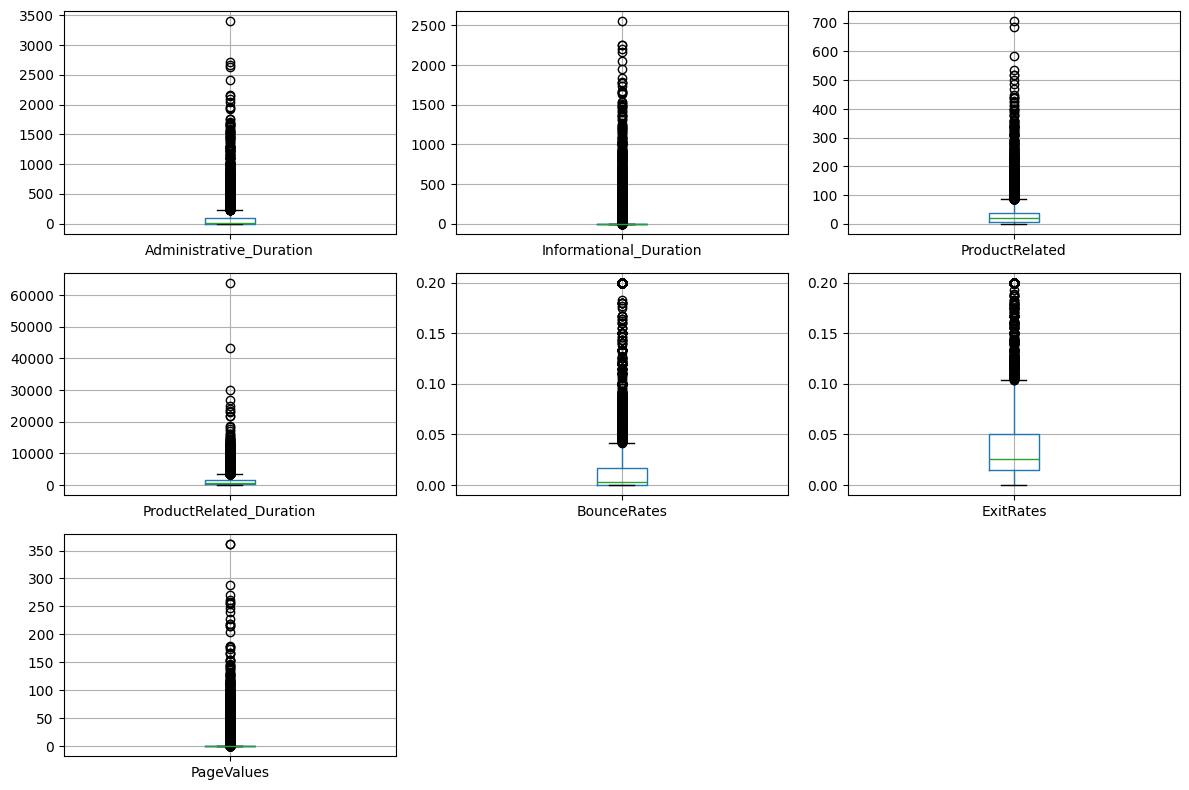

In [ ]:
fig = plt.figure(figsize = (12,8))

for i, col in enumerate(continuous):
    plt.subplot(3, 3, i + 1);
    df.boxplot(col);
    plt.tight_layout()

plt.savefig('boxplot1.png')

In [ ]:
df[continuous] = np.log1p(1 + df[continuous])

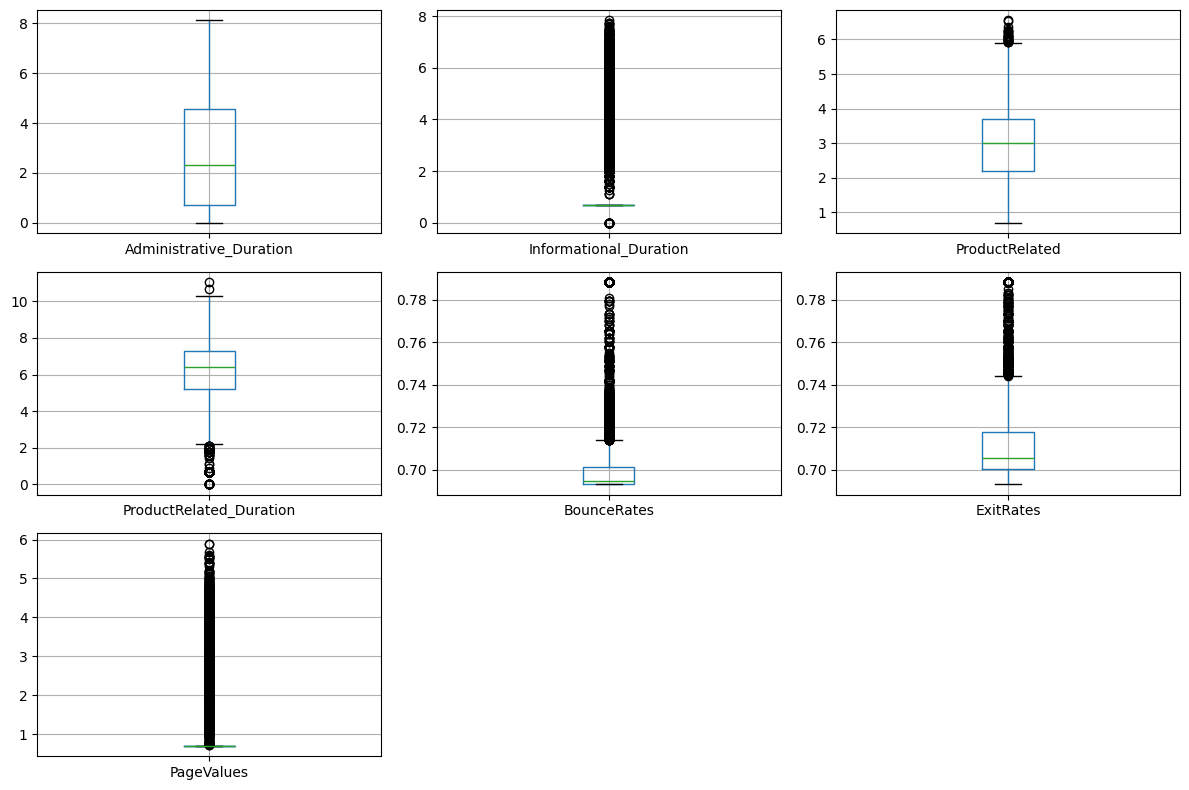

In [ ]:
fig = plt.figure(figsize = (12,8))

for i,col in enumerate(continuous):
    plt.subplot(3,3,i+1);
    df.boxplot(col);
    plt.tight_layout()
plt.savefig('boxplot2.png')

Matriz de Correlação entre as variáveis contínuas

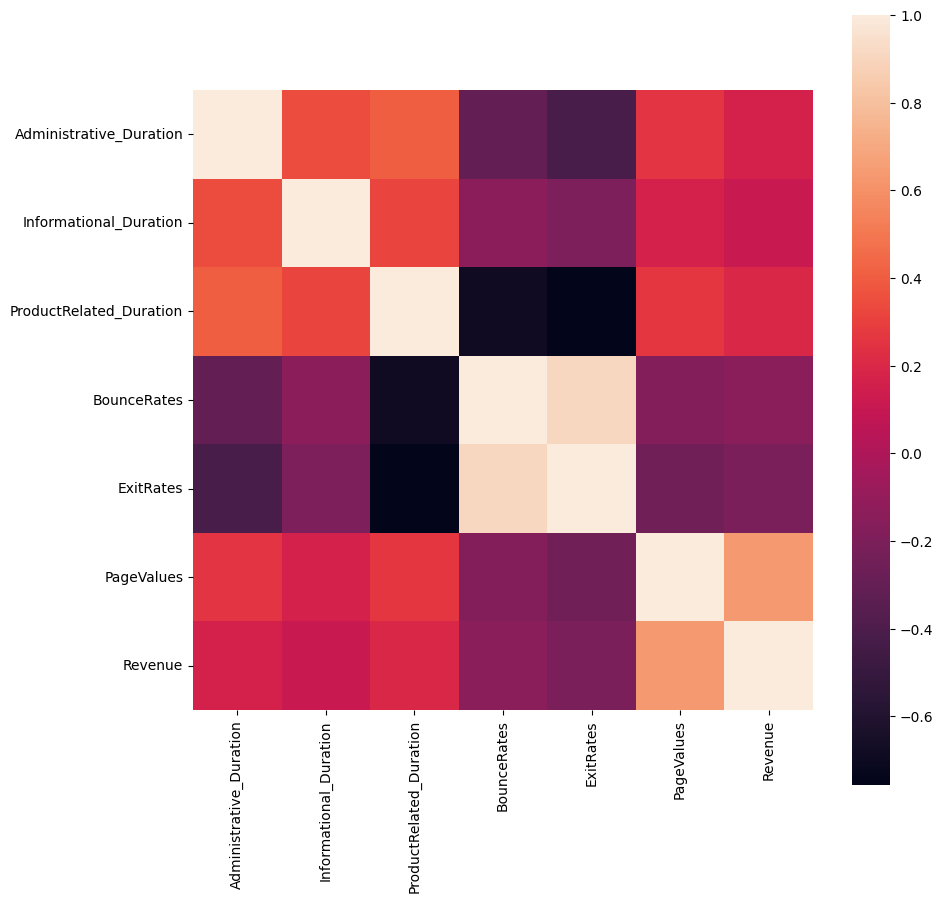

In [ ]:
plt.figure(figsize = (10,10))

sns.heatmap(df[['Administrative_Duration',
                'Informational_Duration',
                'ProductRelated_Duration',
                'BounceRates',
                'ExitRates',
                'PageValues',
                'Revenue']].corr(), vmax = 1., square = True)
plt.show()

###  Gráficos para variáveis categóricas

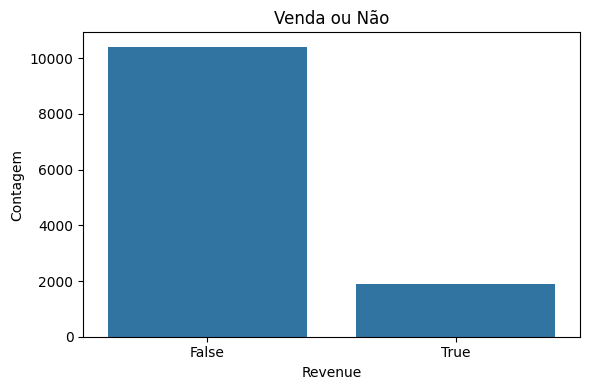

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Revenue', data=df)
plt.title("Venda ou Não")
plt.xlabel("Revenue")
plt.ylabel("Contagem")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

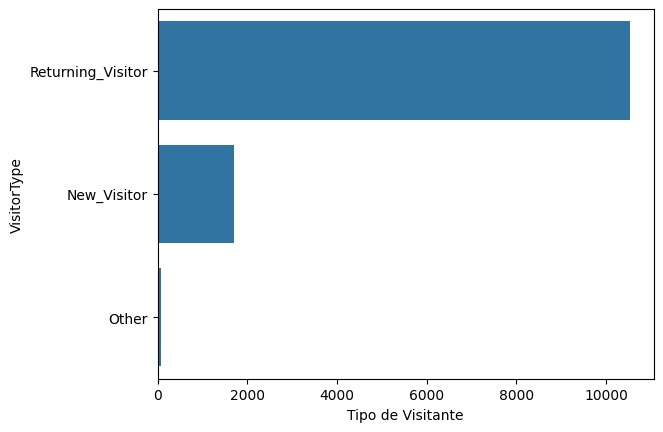

In [ ]:
plt.xlabel("Tipo de Visitante")
sns.countplot(df['VisitorType'])
plt.show()

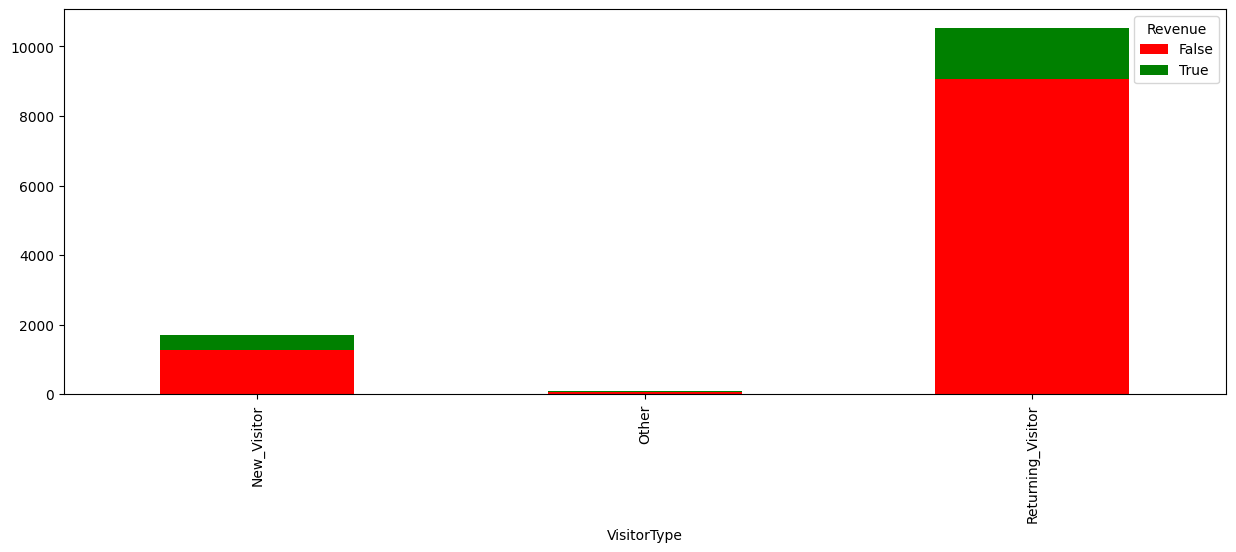

In [ ]:
pd.crosstab(df['VisitorType'], df['Revenue']).plot(kind = 'bar',
                                                   stacked = True,
                                                   figsize = (15, 5),
                                                   color = ['red', 'green'])
plt.show()

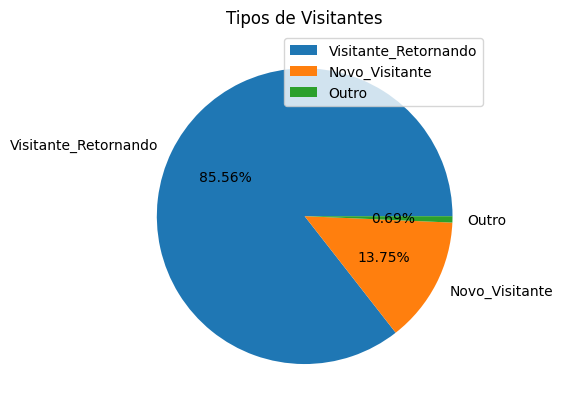

In [ ]:
labels = ['Visitante_Retornando', 'Novo_Visitante', 'Outro']
plt.title("Tipos de Visitantes")
plt.pie(df['VisitorType'].value_counts(), labels = labels, autopct = '%.2f%%')
plt.legend()
plt.show()

Text(0, 0.5, 'Contagem')

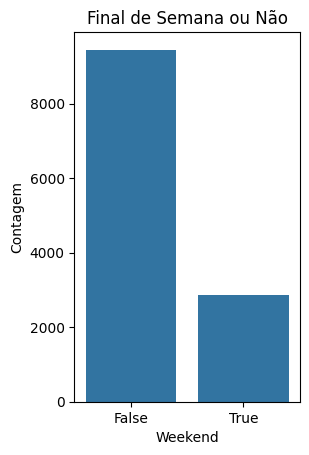

In [ ]:
plt.subplot(1, 2, 1)
plt.title("Final de Semana ou Não")
sns.countplot(x='Weekend', data=df)
plt.xlabel("Weekend")
plt.ylabel("Contagem")

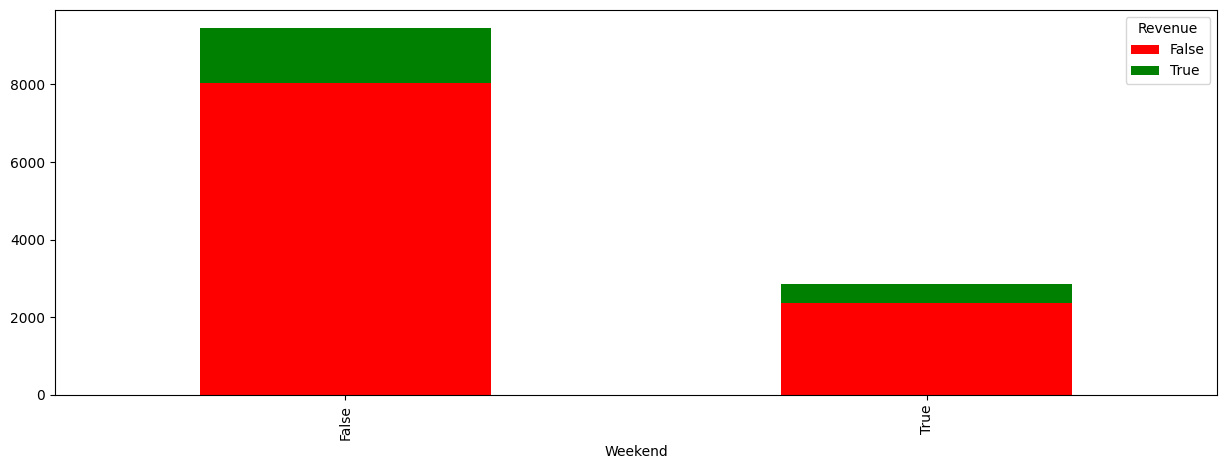

In [ ]:
pd.crosstab(df['Weekend'], df['Revenue']).plot(kind = 'bar',
                                               stacked = True,
                                               figsize = (15, 5),
                                               color = ['red', 'green'])
plt.show()

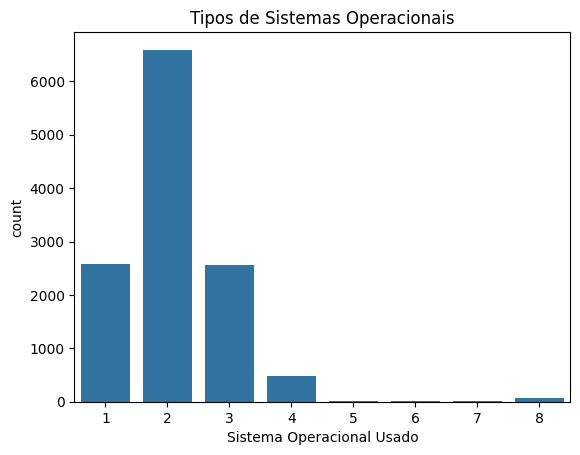

In [ ]:
plt.title("Tipos de Sistemas Operacionais")
plt.xlabel("Sistema Operacional Usado")
sns.countplot(x='OperatingSystems', data=df)
plt.show()

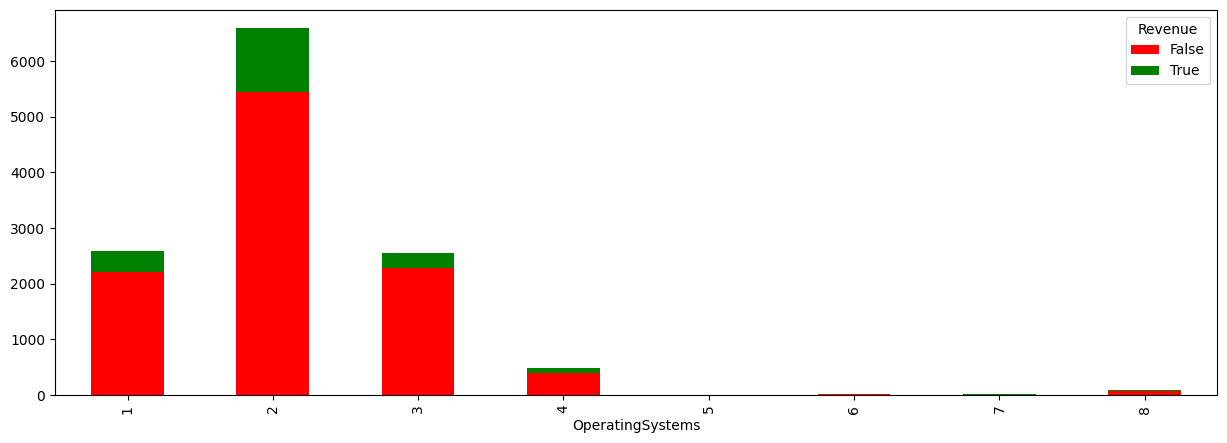

In [ ]:
pd.crosstab(df['OperatingSystems'], df['Revenue']).plot(kind = 'bar',
                                                        stacked = True,
                                                        figsize = (15, 5),
                                                        color = ['red', 'green'])
plt.show()

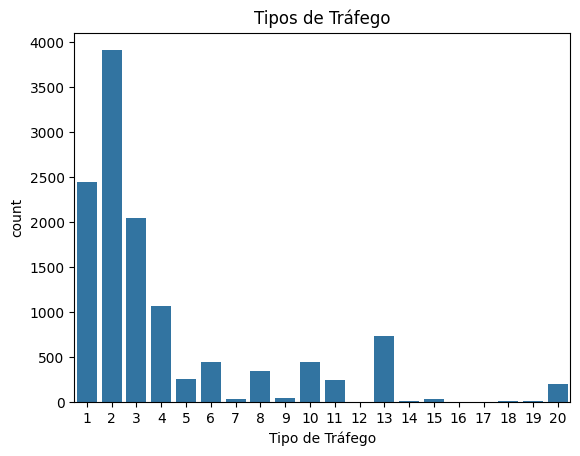

In [ ]:
plt.title("Tipos de Tráfego")
plt.xlabel("Tipo de Tráfego")
sns.countplot(x='TrafficType', data=df)
plt.show()

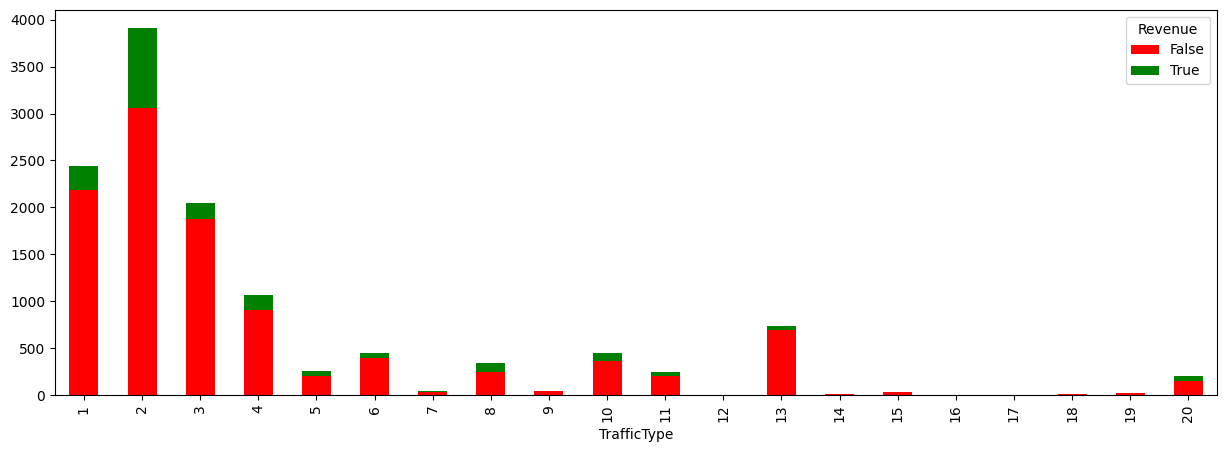

In [ ]:
pd.crosstab(df['TrafficType'], df['Revenue']).plot(kind = 'bar',
                                                   stacked = True,
                                                   figsize = (15, 5),
                                                   color = ['red', 'green'])
plt.show()

### Pré-Processamento dos Dados

In [ ]:
df_original.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


Utilizando o Label Encoder

In [ ]:
lb = LabelEncoder()

df_original['Month'] = lb.fit_transform(df_original['Month'])
df_original['VisitorType'] = lb.fit_transform(df_original['VisitorType'])

df_original.dropna(inplace = True)

In [ ]:
df_original.head(200)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.000000,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,2,1,1,1,1,2,False,False
1,0.0,0.000000,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.000000,0.0,2,2,2,1,2,2,False,False
2,0.0,-1.000000,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.000000,0.0,2,4,1,9,3,2,False,False
3,0.0,0.000000,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.000000,0.0,2,3,2,2,4,2,False,False
4,0.0,0.000000,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.000000,0.0,2,3,3,1,4,2,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.0,0.000000,0.0,0.0,98.0,3556.612410,0.002062,0.010173,0.000000,0.0,5,1,1,1,3,2,False,False
196,2.0,56.000000,1.0,144.0,67.0,2563.783333,0.000000,0.005797,19.342650,0.0,5,2,2,4,2,0,False,True
197,3.0,112.960784,0.0,0.0,13.0,3014.018519,0.013068,0.061406,0.000000,0.0,5,2,2,1,2,2,False,False
198,0.0,0.000000,0.0,0.0,17.0,840.233333,0.000000,0.001667,109.176000,0.0,5,2,2,9,2,0,False,True


In [ ]:
df_original.shape

(12316, 18)

In [ ]:
target_count = df_original.Revenue.value_counts()
target_count

,count
Revenue,
False,10408
True,1908


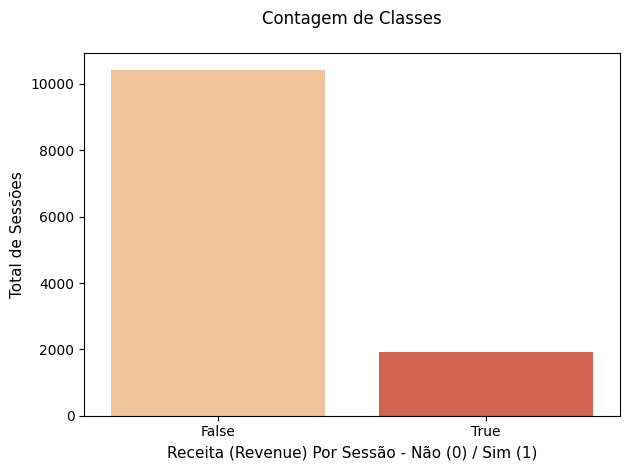

In [ ]:
sns.countplot(x='Revenue', data=df_original, palette="OrRd")
plt.xlabel('Receita (Revenue) Por Sessão - Não (0) / Sim (1)', fontsize=11)
plt.ylabel('Total de Sessões', fontsize=11)
plt.title('Contagem de Classes\n')
plt.tight_layout()
plt.show()

In [ ]:
df_original.shape

(12316, 18)

In [ ]:
df_original.iloc[:, 0:17].head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,True


In [ ]:
df_original.iloc[:, 17].head()

,Revenue
0,False
1,False
2,False
3,False
4,False


Balanceamento de Classe - Oversampling

In [ ]:
seed = 100

X = df_original.iloc[:, 0:17]
y = df_original.iloc[:, 17]

smote_bal = SMOTE(random_state = seed)
X_res, y_res = smote_bal.fit_resample(X, y)

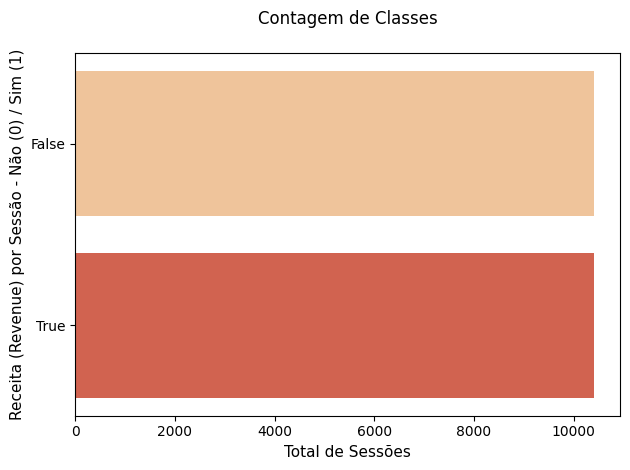

In [ ]:
sns.countplot(y=y_res, palette="OrRd")
plt.xlabel('Total de Sessões', fontsize=11)
plt.ylabel('Receita (Revenue) por Sessão - Não (0) / Sim (1)', fontsize=11)
plt.title('Contagem de Classes\n')
plt.tight_layout()
plt.show()

In [ ]:
df_original.shape

(12316, 18)

Shape dos dados reamostrados

In [ ]:
X_res.shape

(20816, 17)

In [ ]:
y_res.shape

(20816,)

Ajustando X e y

In [ ]:
X = X_res.head(1000)
y = y_res.head(1000)

Divisão de treino e teste

In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Modelo SVM


#### Modelo Base com o Kernel Linear

In [ ]:
modelo_v1 = svm.SVC(kernel = 'linear')

In [ ]:
start = time.time()
modelo_v1.fit(X_treino, y_treino)
end = time.time()
print('Tempo de Treinamento do Modelo:', end - start)

Tempo de Treinamento do Modelo: 68.7139847278595


In [ ]:
previsoes_v1 = modelo_v1.predict(X_teste)

In [ ]:
SVM_dict_v1 = {'Modelo':'SVM',
               'Versão':'1',
               'Kernel':'Linear',
               'Precision':precision_score(previsoes_v1, y_teste),
               'Recall':recall_score(previsoes_v1, y_teste),
               'F1 Score':f1_score(previsoes_v1, y_teste),
               'Acurácia':accuracy_score(previsoes_v1, y_teste),
               'AUC':roc_auc_score(y_teste, previsoes_v1)}

In [ ]:
print("Métricas em Teste:\n")
SVM_dict_v1

Métricas em Teste:



{'Modelo': 'SVM',
 'Versão': '1',
 'Kernel': 'Linear',
 'Precision': 0.52,
 'Recall': 0.7647058823529411,
 'F1 Score': 0.6190476190476191,
 'Acurácia': 0.9466666666666667,
 'AUC': np.float64(0.7527272727272728)}

#### Modelo com Kernel Linear e Dados Padronizados (Scaled)

Padronização

In [ ]:
sc = StandardScaler()
X_treino_scaled = sc.fit_transform(X_treino)
X_teste_scaled = sc.transform(X_teste)

In [ ]:
X_treino_scaled

array([[-0.59034343, -0.40561073, -0.31756214, ..., -0.75751167,
         0.33597259, -0.54433105],
       [-0.59034343, -0.40561073, -0.31756214, ..., -0.41048407,
         0.33597259,  1.83711731],
       [ 0.07887179, -0.33356238, -0.31756214, ..., -0.75751167,
         0.33597259, -0.54433105],
       ...,
       [-0.59034343, -0.40561073, -0.31756214, ..., -0.41048407,
        -2.97643326, -0.54433105],
       [ 0.07887179, -0.16326629, -0.31756214, ..., -0.41048407,
        -2.97643326,  1.83711731],
       [-0.59034343, -0.40561073, -0.31756214, ..., -0.41048407,
         0.33597259, -0.54433105]])

In [ ]:
X_teste_scaled

array([[ 0.4134794 , -0.02571945, -0.31756214, ..., -0.06345648,
         0.33597259, -0.54433105],
       [-0.25573582, -0.26151404, -0.31756214, ..., -0.41048407,
         0.33597259, -0.54433105],
       [ 1.08269462,  1.52462998,  4.89244178, ..., -0.75751167,
         0.33597259, -0.54433105],
       ...,
       [-0.59034343, -0.40561073, -0.31756214, ..., -0.41048407,
         0.33597259, -0.54433105],
       [-0.25573582, -0.41216058, -0.31756214, ...,  0.63059872,
         0.33597259,  1.83711731],
       [-0.59034343, -0.40561073, -0.31756214, ..., -0.75751167,
         0.33597259,  1.83711731]])

Criação do Modelo

In [ ]:
modelo_v2 = svm.SVC(kernel = 'linear')

In [ ]:
start = time.time()
modelo_v2.fit(X_treino_scaled, y_treino)
end = time.time()
print('Tempo de Treinamento do Modelo:', end - start)

Tempo de Treinamento do Modelo: 0.014291524887084961


In [ ]:
previsoes_v2 = modelo_v2.predict(X_teste_scaled)

In [ ]:
SVM_dict_v2 = {'Modelo':'SVM',
               'Versão':'2',
               'Kernel':'Linear com Dados Padronizados',
               'Precision':precision_score(previsoes_v2, y_teste),
               'Recall':recall_score(previsoes_v2, y_teste),
               'F1 Score':f1_score(previsoes_v2, y_teste),
               'Acurácia':accuracy_score(previsoes_v2, y_teste),
               'AUC':roc_auc_score(y_teste, previsoes_v2)}

In [ ]:
print("Métricas em Teste:\n")
SVM_dict_v2

Métricas em Teste:



{'Modelo': 'SVM',
 'Versão': '2',
 'Kernel': 'Linear com Dados Padronizados',
 'Precision': 0.48,
 'Recall': 0.8571428571428571,
 'F1 Score': 0.6153846153846154,
 'Acurácia': 0.95,
 'AUC': np.float64(0.7363636363636362)}

### Otimização de Hiperparâmetros com Gride Search e Kernel RBF

In [ ]:
modelo_v3 = svm.SVC(kernel = 'rbf')

C_range = np.array([50., 100., 200.])
gamma_range = np.array([0.3*0.001,0.001,3*0.001])

svm_param_grid = dict(gamma = gamma_range, C = C_range)

start = time.time()
modelo_v3_grid_search_rbf = GridSearchCV(modelo_v3, svm_param_grid, cv = 3)

modelo_v3_grid_search_rbf.fit(X_treino_scaled, y_treino)
end = time.time()
print('Tempo de Treinamento do Modelo com Grid Search:', end - start)

print(f"Acurácia em Treinamento: {modelo_v3_grid_search_rbf.best_score_ :.2%}")
print("")
print(f"Hiperparâmetros Ideais: {modelo_v3_grid_search_rbf.best_params_}")

Tempo de Treinamento do Modelo com Grid Search: 0.20418882369995117
Acurácia em Treinamento: 94.86%

Hiperparâmetros Ideais: {'C': np.float64(50.0), 'gamma': np.float64(0.003)}


In [ ]:
previsoes_v3 = modelo_v3_grid_search_rbf.predict(X_teste_scaled)

In [ ]:
SVM_dict_v3 = {'Modelo':'SVM',
               'Versão':'3',
               'Kernel':'RBF com Dados Padronizados',
               'Precision':precision_score(previsoes_v3, y_teste),
               'Recall':recall_score(previsoes_v3, y_teste),
               'F1 Score':f1_score(previsoes_v3, y_teste),
               'Acurácia':accuracy_score(previsoes_v3, y_teste),
               'AUC':roc_auc_score(y_teste, previsoes_v3)}

In [ ]:
print("Métricas em Teste:\n")
SVM_dict_v3

Métricas em Teste:



{'Modelo': 'SVM',
 'Versão': '3',
 'Kernel': 'RBF com Dados Padronizados',
 'Precision': 0.52,
 'Recall': 0.8666666666666667,
 'F1 Score': 0.65,
 'Acurácia': 0.9533333333333334,
 'AUC': np.float64(0.7563636363636363)}

### Otimização de Hiperparâmetros com Grid Search e Kernel Poliomial

In [ ]:
modelo_v4 = svm.SVC(kernel = 'poly')

r_range =  np.array([0.5, 1])
gamma_range =  np.array([0.001, 0.01])
d_range = np.array([2,3, 4])

param_grid_poly = dict(gamma = gamma_range, degree = d_range, coef0 = r_range)

start = time.time()
modelo_v4_grid_search_poly = GridSearchCV(modelo_v4, param_grid_poly, cv = 3)

modelo_v4_grid_search_poly.fit(X_treino_scaled, y_treino)
end = time.time()
print('Tempo de Treinamento do Modelo com Grid Search:', end - start)

print(f"Acurácia em Treinamento: {modelo_v4_grid_search_poly.best_score_ :.2%}")
print("")
print(f"Hiperparâmetros Ideais: {modelo_v4_grid_search_poly.best_params_}")

Tempo de Treinamento do Modelo com Grid Search: 0.21428918838500977
Acurácia em Treinamento: 94.86%

Hiperparâmetros Ideais: {'coef0': np.float64(1.0), 'degree': np.int64(3), 'gamma': np.float64(0.01)}


In [ ]:
previsoes_v4 = modelo_v4_grid_search_poly.predict(X_teste_scaled)

In [ ]:
SVM_dict_v4 = {'Modelo':'SVM',
               'Versão':'4',
               'Kernel':'Polinomial com Dados Padronizados',
               'Precision':precision_score(previsoes_v4, y_teste),
               'Recall':recall_score(previsoes_v4, y_teste),
               'F1 Score':f1_score(previsoes_v4, y_teste),
               'Acurácia':accuracy_score(previsoes_v4, y_teste),
               'AUC':roc_auc_score(y_teste, previsoes_v4)}

In [ ]:
print("Métricas em Teste:\n")
SVM_dict_v4

Métricas em Teste:



{'Modelo': 'SVM',
 'Versão': '4',
 'Kernel': 'Polinomial com Dados Padronizados',
 'Precision': 0.4,
 'Recall': 0.7692307692307693,
 'F1 Score': 0.5263157894736842,
 'Acurácia': 0.94,
 'AUC': np.float64(0.6945454545454546)}

### Métricas

In [ ]:
resumo = pd.DataFrame({'SVM_Modelo_1':pd.Series(SVM_dict_v1),
                       'SVM_Modelo_2':pd.Series(SVM_dict_v2),
                       'SVM_Modelo_3':pd.Series(SVM_dict_v3),
                       'SVM_Modelo_4':pd.Series(SVM_dict_v4)})

In [ ]:
resumo

,SVM_Modelo_1,SVM_Modelo_2,SVM_Modelo_3,SVM_Modelo_4
Modelo,SVM,SVM,SVM,SVM
Versão,1,2,3,4
Kernel,Linear,Linear com Dados Padronizados,RBF com Dados Padronizados,Polinomial com Dados Padronizados
Precision,0.52,0.48,0.52,0.4
Recall,0.764706,0.857143,0.866667,0.769231
F1 Score,0.619048,0.615385,0.65,0.526316
Acurácia,0.946667,0.95,0.953333,0.94
AUC,0.752727,0.736364,0.756364,0.694545
